<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Linear</a></span><ul class="toc-item"><li><span><a href="#Simulando-dados" data-toc-modified-id="Simulando-dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulando dados</a></span><ul class="toc-item"><li><span><a href="#Construindo-modelo" data-toc-modified-id="Construindo-modelo-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Construindo modelo</a></span><ul class="toc-item"><li><span><a href="#Com-statsmodels" data-toc-modified-id="Com-statsmodels-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Com statsmodels</a></span></li><li><span><a href="#Com-SKLEARN" data-toc-modified-id="Com-SKLEARN-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Com SKLEARN</a></span></li></ul></li><li><span><a href="#Fazendo-previsões-com-SKLEARN" data-toc-modified-id="Fazendo-previsões-com-SKLEARN-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Fazendo previsões com SKLEARN</a></span></li></ul></li><li><span><a href="#Com-dados-reais" data-toc-modified-id="Com-dados-reais-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Com dados reais</a></span><ul class="toc-item"><li><span><a href="#Utilizando-StatsModels" data-toc-modified-id="Utilizando-StatsModels-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Utilizando StatsModels</a></span></li><li><span><a href="#Utilizando-SKLEARN" data-toc-modified-id="Utilizando-SKLEARN-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Utilizando SKLEARN</a></span></li><li><span><a href="#Avaliando-Erro" data-toc-modified-id="Avaliando-Erro-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Avaliando Erro</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Introdução à Regressão Linear com **statsmodels** e **scikit-learn**

A **regressão linear** é uma técnica estatística utilizada para analisar a relação entre duas ou mais variáveis. Em sua forma mais simples, a regressão linear examina como uma variável numérica de resposta (ou variável dependente) varia em relação a uma ou mais variáveis explicativas (ou variáveis independentes). A análise envolve a identificação de uma **reta estimada** que melhor representa essa relação.

Em termos matemáticos, a **reta estimada** é determinada pelo menor valor da soma dos quadrados dos resíduos, o que é conhecido como o método dos mínimos quadrados. Esta **reta estimada** é usada para prever valores futuros da variável dependente com base nas variáveis ​​independentes disponíveis.

Com as bibliotecas Python ***statsmodels*** e ***scikit-learn***, podemos facilmente realizar análises de regressão linear e prever resultados numéricos com base em uma ou mais variáveis de entrada. 

No ***statsmodels***, podemos criar um modelo de regressão linear simples com a função `OLS` (Ordinary Least Squares) e ajustá-lo aos nossos dados usando o método `fit`. Em seguida, podemos usar o método `summary` para visualizar as estatísticas do modelo, incluindo os coeficientes das variáveis explicativas e suas significâncias estatísticas.

Por outro lado, no ***Scikit-learn***, podemos utilizar a classe `LinearRegression` como nosso modelo e ajustá-lo aos dados utilizando o método `fit()`. Além disso, podemos usar funções como `train_test_split` para dividir nossos dados em conjuntos de treino e teste e `mean_squared_error` para medir a precisão do nosso modelo.

Embora a regressão linear possa parecer complexa, as bibliotecas Python nos fornecem uma série de ferramentas eficientes para torná-la acessível e fácil de usar. Com o ***statsmodels*** e o ***scikit-learn*** ao seu lado, você estará pronto para explorar tendências em dados e fazer previsões precisas!

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Simulando dados

In [3]:
def simular_dado(media_X, desvpad_X, 
                 desvpad_E, A, B, 
                 samples):
    
    x = np.random.normal(loc = media_X, scale = desvpad_X, size = samples)
    
    E = np.random.normal(loc = 0, scale = desvpad_E, size = samples)
    
    y = B + A * x + E
    return pd.DataFrame({'x' : x, 'y' : y})

In [4]:
teste = simular_dado(media_X = 0, desvpad_X = 1, 
                     desvpad_E = 5, A = 10, B = 50, 
                     samples = 100)

In [5]:
# y = 50 + 10 * x
# E = Normal(0, 5)
# n = 100

## Visualizando a regressão

Em estatística, a regressão linear simples é um modelo matemático que busca estabelecer uma relação linear entre duas variáveis. Essa relação pode ser expressa por meio de uma equação, que relaciona uma variável dependente (Y) a outra variável independente (X).

O objetivo da regressão linear simples é encontrar a equação da reta que melhor se ajusta aos dados observados e, para isso, são utilizados os conceitos de coeficiente angular e intercepto. A reta da regressão é definida pela fórmula $Y = \alpha+ \beta X$ onde **Y** é a variável dependente, **X** é a variável independente, $\alpha$ é o intercepto e $\beta$ é o coeficiente angular:

### Coeficiente Angular

O coeficiente angular é uma medida que indica a inclinação da reta em relação ao eixo X, na equação de regressão linear simples. Ele representa a taxa de variação da variável Y para cada aumento unitário na variável X. Em outras palavras, o coeficiente angular nos diz como a variável dependente (Y) muda em resposta às mudanças na variável independente (X).
- Se o coeficiente angular for um número positivo, significa que à medida que X aumenta, Y também aumenta. Isso indica uma relação positiva entre as duas variáveis. Por exemplo, suponha que estejamos analisando a relação entre a quantidade de horas de estudo (variável X) e a nota obtida em uma prova (variável Y). Se o coeficiente angular for 2, isso significa que para cada hora adicional de estudo, espera-se que a nota do aluno aumente em 2 pontos.

- Por outro lado, se o coeficiente angular for um número negativo, significa que à medida que X aumenta, Y diminui. Isso indica uma relação negativa entre as duas variáveis. Continuando com o exemplo anterior, se o coeficiente angular for -1,5, isso significa que, para cada hora adicional de estudo, espera-se que a nota do aluno diminua em 1,5 pontos.

Em resumo, o coeficiente angular é uma medida importante na equação de regressão linear simples, pois nos ajuda a entender a relação entre as variáveis X e Y. Ele nos permite fazer previsões sobre o valor de Y para diferentes valores de X, o que pode ser útil em diferentes áreas, como finanças, economia, ciências sociais e muitas outras.

### Intercepto 

O intercepto é a intersecção da reta com o eixo Y. Ele representa o valor de "Y" quando "X" é igual a zero. Em outras palavras, é o ponto onde a reta cruza o eixo Y. O intercepto é representado pela letra "a" na equação da regressão.

A equação da regressão linear simples, portanto, nos fornece informações sobre a relação entre duas variáveis contínuas. O coeficiente angular nos diz qual é a taxa de variação de Y em relação a X, enquanto o intercepto nos dá o valor de Y quando X é igual a zero. Esses conceitos são importantes para entendermos como se dá a relação entre duas variáveis e para fazermos previsões a partir dos dados observados.

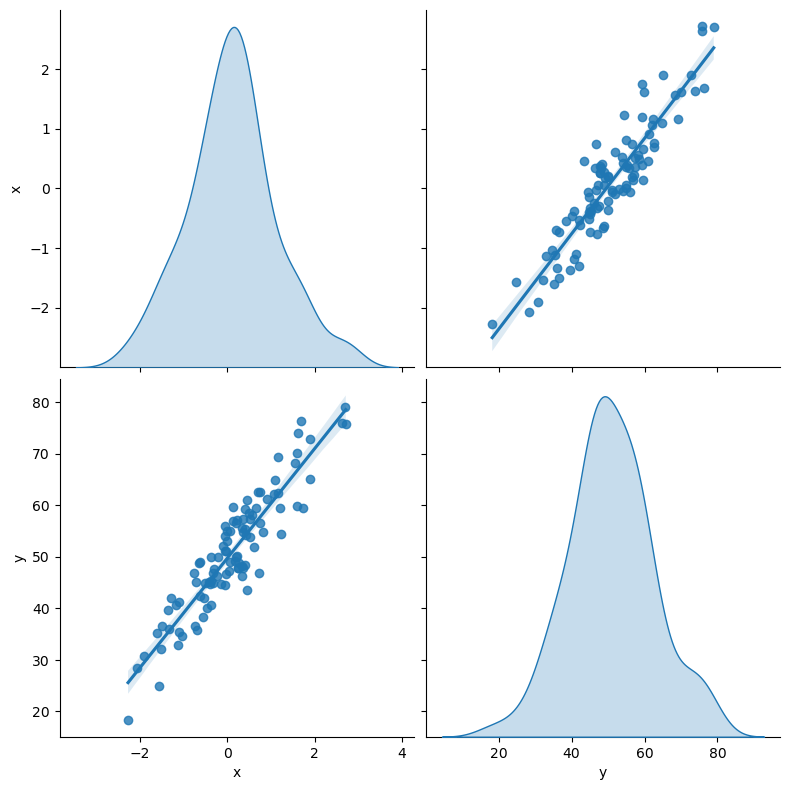

In [6]:
sns.pairplot(data = teste, diag_kind = 'kde', kind = 'reg',
            height = 4)

### Construindo modelo

Na análise estatística, a distinção entre variáveis endógenas e exógenas é importante. As variáveis endógenas são aquelas que estão diretamente relacionadas ao fenômeno estudado, enquanto as variáveis exógenas são aquelas que não possuem uma relação direta com o fenômeno. Vamos entender melhor essa diferença:

- **Variáveis Endógenas (dependentes):** São variáveis que dependem do modelo criado e o objetivo é explicá-las. Em outras palavras, elas são o resultado ou a resposta do modelo. Por exemplo, em um modelo de regressão para prever o preço das casas, o preço seria a variável endógena, pois é o que se deseja prever.

- **Variáveis Exógenas (independentes):** São variáveis que afetam a variável endógena, mas não são afetadas por ela. Elas são incluídas no modelo para ajudar a explicar a variação da variável endógena. Continuando com o mesmo exemplo do modelo de regressão para prever o preço das casas, as variáveis exógenas poderiam ser o tamanho da casa, o número de quartos, a localização da casa, a idade do imóvel, etc.

Em resumo, as variáveis endógenas são dependentes do modelo e precisam ser explicadas, enquanto as variáveis exógenas são independentes do modelo e são usadas para explicar as variações na variável endógena. É importante destacar que a distinção entre esses tipos de variáveis é crucial na modelagem estatística e econômica, pois ajuda a identificar quais variáveis devem ser incluídas no modelo e como interpretar os resultados.

#### Com statsmodels

In [7]:
teste = simular_dado(media_X = 0, desvpad_X = 1, 
                     desvpad_E = 6, A = 10, B = 5, 
                     samples = 100)

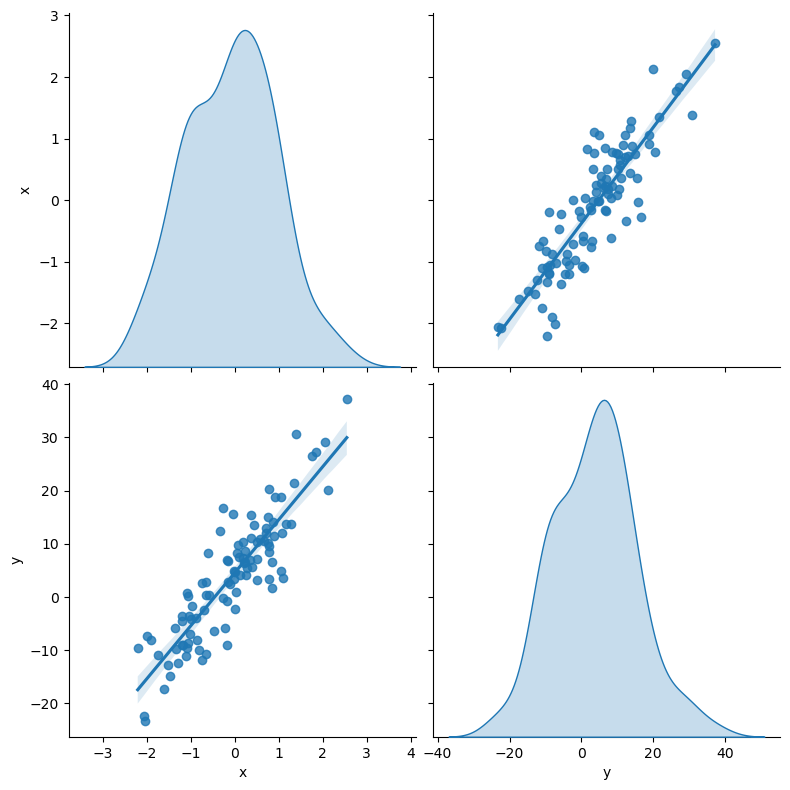

In [8]:
sns.pairplot(data = teste, diag_kind = 'kde', kind = 'reg',
            height = 4)

Agora, vamos definir nossas variáves dependentes e independentes. Tradicionalmente, chamamos de `X` nossa *matriz de variáveis independentes* e de `y` a nossa *variável resposta*:

In [9]:
X = sm.add_constant(teste['x'])

In [10]:
y = teste['y']

Agora, vamos criar o objeto do modelo e utilizar o método `.fit()` para estimar os parâmetros deste modelo:

In [11]:
modelo = sm.OLS(y, X)

In [12]:
lm_fit = modelo.fit()

Para visualizar os resultados da regressão, podemos utilizar o método `.summary()`:

In [28]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     340.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.21e-33
Time:                        18:47:30   Log-Likelihood:                -310.49
No. Observations:                 100   AIC:                             625.0
Df Residuals:                      98   BIC:                             630.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5754      0.547      8.362      0.0

Os conceitos de **R²**, **intervalo de confiança dos coeficientes** e **relevância estatística dos coeficientes** são importantes para avaliar a qualidade e a precisão da equação de regressão linear simples.

- O ***coeficiente de determinação*** (**R²**) é uma medida que indica a proporção da variabilidade dos valores de Y que pode ser explicada pela variação na variável X. O valor de R² varia de 0 a 1, sendo que quanto mais próximo de 1, melhor é o ajuste da equação de regressão aos dados. Um valor baixo de R² indica que a equação de regressão não explica bem a variação nos dados, enquanto um valor alto indica que a maioria da variação em Y pode ser explicada por variação em X. Em outras palavras, **R² mede a quantidade de variação na variável dependente que está sendo explicada pelos valores da variável independente**.

- ***Intervalo de confiança dos coeficientes*** é uma faixa de valores dentro da qual se espera que os verdadeiros valores dos coeficientes da equação de regressão linear estejam contidos com uma determinada probabilidade. Ele indica a incerteza associada à estimativa pontual do coeficiente. Quanto menor o intervalo de confiança, mais precisos são os coeficientes estimados.

- A ***relevância estatística dos coeficientes*** é uma medida que indica se os valores dos coeficientes estimados são significativamente diferentes de zero ou não. Isso é importante porque os coeficientes não são úteis se não forem significativamente diferentes de zero. O teste de significância é usado para avaliar a probabilidade de que os valores dos coeficientes estimados possam ter ocorrido ao acaso. Se o valor-p do teste de significância for menor que o nível de significância escolhido (geralmente 0,05 ou 0,01), então podemos rejeitar a hipótese nula de que o coeficiente é igual a zero e **concluir que o coeficiente é estatisticamente significativo**.

Em resumo, **R² mede a qualidade do ajuste da equação de regressão aos dados**, o **intervalo de confiança dos coeficientes** mede a precisão das estimativas dos coeficientes e a **relevância estatística dos coeficientes indica se os valores dos coeficientes estimados são significativamente diferentes de zero**. Todos estes conceitos são fundamentais para avaliar a validade e utilidade de uma equação de regressão linear.

Vamos simular um conjunto de dados para visualizar como operacionalizar esses conceitos:

In [14]:
def estimar_lm(data):
    X = sm.add_constant(data['x'])
    y = data['y']
    modelo = sm.OLS(y, X)
    lm_fit = modelo.fit()
    return lm_fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.587
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.211
Time:                        18:47:12   Log-Likelihood:                -375.36
No. Observations:                 100   AIC:                             754.7
Df Residuals:                      98   BIC:                             759.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1526      1.046     -1.102      0.273      -3.228       0.923
x              1.2471      0.990      1.260      0.211      -0.717       3.211
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   2.304
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.323
Skew:                          -0.105   Prob(JB):                        0.516
Kurtosis:                       3.523   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

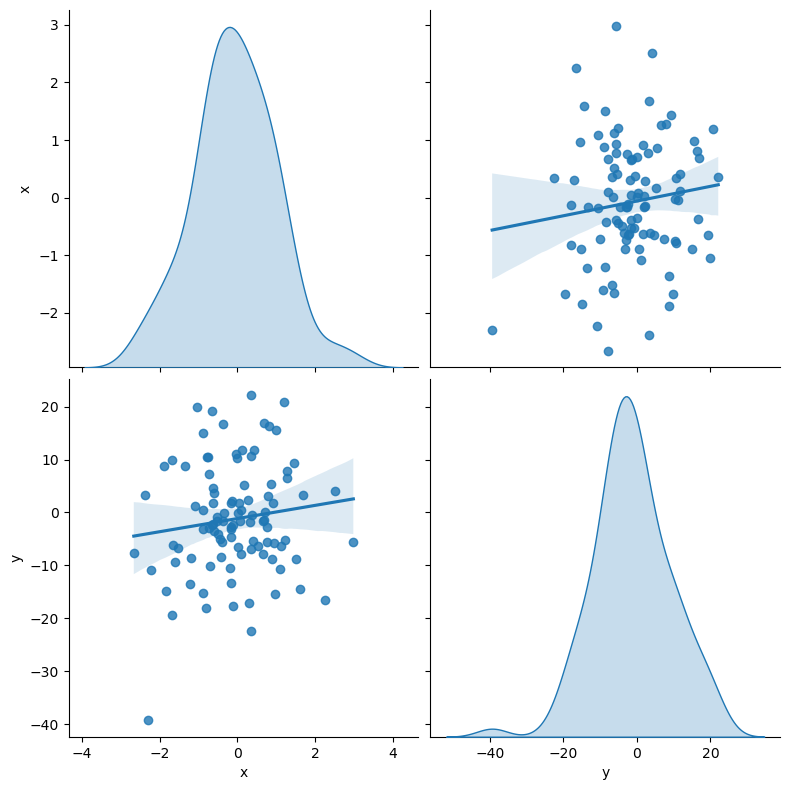

In [15]:
teste_1 = simular_dado(media_X=0,
                       desvpad_X=1,
                       desvpad_E=10,
                       A=1,
                       B=0,
                       samples=100)

teste1_fit = estimar_lm(teste_1)
sns.pairplot(data = teste_1, diag_kind = 'kde', kind = 'reg',
            height = 4)
teste1_fit.summary()

#### Com SKLEARN

A principal diferença entre a biblioteca de regressão linear da **sklearn** e da **statsmodels** é que a **sklearn** é mais voltada para *machine learning*, enquanto a **statsmodels** é mais orientada à estatística clássica.

A partir do ponto de vista da programação, a **sklearn** é mais simples de usar por causa da sua API intuitiva, excelente documentação e possibilidade de ser integrada com facilidade em pipelines de *machine learning*. A **statsmodels**, por outro lado, pode ter uma sintaxe menos intuitiva e talvez seja mais adequada para usuários que já trabalharam com outras linguagens de estatística, como o R.

Além disso, a **sklearn** possui mais funcionalidades relacionadas a pré-processamento de dados e validação cruzada, enquanto a **statsmodels** oferece mais ferramentas de diagnóstico e análise de resultados.

Resumindo, a escolha entre usar a **sklearn** ou a **statsmodels** depende do objetivo do projeto e do nível de experiência do usuário em estatística e *machine learning*. Para análises mais complexas e voltadas para inferência estatística, a **statsmodels** pode ser mais indicada. Já para projetos mais simples e voltados para predição e *machine learning*, a **sklearn** pode ser a melhor opção.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
modelo = LinearRegression()

In [31]:
X = teste[['x']]
y = teste['y']

In [32]:
modelo.fit(X, y)

LinearRegression()

In [33]:
print(modelo.coef_[0])
print(modelo.intercept_)

9.964566349711193
4.575449666083162


### Fazendo previsões com SKLEARN

In [34]:
modelo.predict(X)

array([ 12.1104934 ,  -9.04045883,  -6.45289674,  12.95869566,
        -8.35892735,  -5.99432923, -11.3834075 ,  -2.82813219,
        11.07922571,   9.61027811,  12.12809693,   5.836828  ,
         5.56634744,  -8.6928914 ,   4.43945152, -15.88375739,
        -1.58097381,  10.19914096,  -5.26797506,  13.6286132 ,
         9.58071572,   4.61104511,   8.56364893,   1.81087353,
         4.42043453,  -5.95286006,   2.87665815,   1.93335789,
        25.74600523,  17.32439238,   2.29016546,   1.21392209,
        16.26620968,  13.28906461,  -7.40709399,  -1.17436752,
        -6.24508809,  -7.196214  ,   6.62113574,  15.60361147,
         3.05568874,   2.69385391,  11.58824562,   8.23591438,
        18.0105252 ,  12.21372455,   6.95119894,   8.91855609,
         6.32085144,  -7.30131451,  12.34948139, -12.89342856,
        -4.07993414,   8.23230659, -14.33592918, -16.07745498,
        13.52916668,   6.4254371 ,  12.24881521,  15.17040649,
         7.03267945,  -7.30599142,   4.21648853,  29.95

In [35]:
teste['pred'] = modelo.predict(X)

In [23]:
teste

,x,y,pred
0,0.756184,15.045656,12.110493
1,-1.366433,-5.732006,-9.040459
2,-1.106756,-11.027250,-6.452897
3,0.841306,6.674373,12.958696
4,-1.298037,-12.351897,-8.358927
...,...,...,...
95,-0.659412,2.820049,-1.995304
96,-0.465564,-6.308252,-0.063698
97,-1.011326,-6.930708,-5.501974
98,-1.471269,-14.883593,-10.085104


<AxesSubplot: xlabel='x', ylabel='y'>

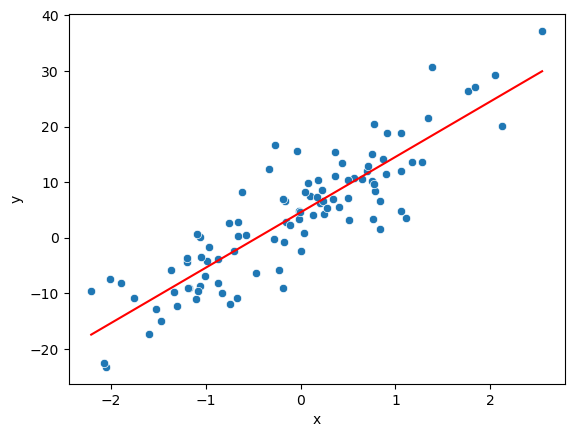

In [24]:
sns.scatterplot(data=teste, x = 'x', y = 'y')
sns.lineplot(data=teste, x = 'x', y = 'pred', color = 'red')

##### Calculando o Erro

RMSE (Root Mean Square Error, em português Erro Quadrático Médio) é uma medida de desempenho comumente utilizada para avaliar a acurácia de modelos de regressão.

O RMSE é definido como a raiz quadrada da média dos erros ao quadrado entre as previsões do modelo e os valores observados. O erro é a diferença entre o valor real e o valor previsto, ou seja:

```python
RMSE = sqrt(1/n * sum((y_i - y_hat_i)^2))
```

onde:

* n: número de amostras
* y_i: valor observado real
* y_hat_i: valor previsto pelo modelo

O RMSE indica a magnitude média do erro cometido pelo modelo em relação aos valores observados. Quanto menor o RMSE, melhor é o desempenho do modelo, indicando que as previsões do modelo possuem um pequeno desvio em relação aos valores reais.

A interpretação do RMSE pode variar com base na unidade da variável dependente, por isso é importante analisar também outros indicadores de desempenho, como o R² e o MAE (Mean Absolute Error, em português Erro Absoluto Médio).

<AxesSubplot: xlabel='erro', ylabel='Count'>

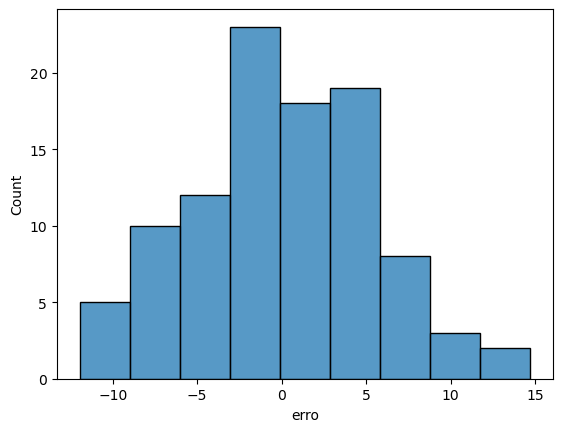

In [25]:
teste['erro'] = teste['y'] - teste['pred']
sns.histplot(data = teste, x = 'erro')

In [26]:
np.sqrt((teste['erro'] ** 2).mean())

5.397548250662885

## Com dados reais

Vamos utilizar um dataset criado a partir do DB Olist para visualizar como podemos utilizar uma regressão para quantificar o impacto de uma variável sobre outra.

### Utilizando StatsModels

In [37]:
tb_olist = pd.read_csv('data/tb_diaria_olist.csv')
tb_olist.describe()

,num_pedidos,avg_review,std_review,per_detractor,per_atraso,avg_atraso,cv_review,mm_num_pedidos,mm_avg_review,mm_cv_review,mm_per_detractor,mm_per_atraso
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,155.606648,4.077337,1.320554,0.232236,0.063696,0.653575,0.327721,155.657948,4.073465,0.328720,0.233343,0.064258
std,77.529889,0.247652,0.190119,0.072723,0.062367,0.774158,0.065786,47.488911,0.200077,0.051103,0.057404,0.057108
min,3.000000,3.322176,0.000000,0.000000,0.000000,0.000000,0.000000,89.857143,3.455875,0.237149,0.132707,0.002707
25%,109.000000,3.940909,1.212832,0.182266,0.021978,0.168317,0.285608,111.714286,3.989496,0.294851,0.194416,0.028508
50%,142.000000,4.116279,1.315797,0.219388,0.043478,0.395210,0.318805,159.857143,4.103207,0.321113,0.222986,0.042033
75%,187.000000,4.248945,1.439813,0.273196,0.082397,0.876812,0.365143,182.928571,4.211584,0.350699,0.257911,0.076023
max,789.000000,5.000000,1.746777,0.447699,0.313808,6.250000,0.525793,358.857143,4.408870,0.482608,0.401864,0.271882


<AxesSubplot: xlabel='per_atraso', ylabel='avg_review'>

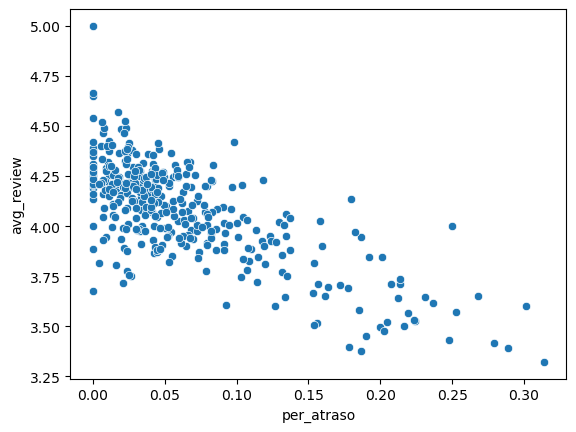

In [38]:
sns.scatterplot(data = tb_olist, x = 'per_atraso', y = 'avg_review')

In [39]:
X = sm.add_constant(tb_olist['per_atraso'] * 100)
y = tb_olist['avg_review']

In [40]:
modelo = sm.OLS(y, X)
lm_fit = modelo.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_review   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     421.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.74e-62
Time:                        19:08:18   Log-Likelihood:                 132.25
No. Observations:                 361   AIC:                            -260.5
Df Residuals:                     359   BIC:                            -252.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2632      0.013    336.640      0.0

Como podemos interpretar os resultados acima?

### Utilizando SKLEARN

In [67]:
lm_fit = LinearRegression()
X = tb_olist[['per_atraso']]
y = tb_olist['avg_review']
lm_fit.fit(X, y)

LinearRegression()

In [68]:
lm_fit.coef_

array([-2.91771914])

In [71]:
lm_fit.predict([[1]])

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.34546438])

### Avaliando Erro com `train_test_split`

O `train_test_split` é uma técnica muito importante em modelos de Machine Learning para avaliar a capacidade do modelo de generalizar resultados para novos dados, ou seja, para casos que não foram usados durante o treinamento.

Em uma tarefa de aprendizado supervisionado, temos um conjunto de dados onde as entradas e saídas esperadas são conhecidas. O objetivo do modelo é encontrar um padrão nos dados de treinamento que permita fazer previsões precisas sobre novos dados. 

No entanto, se avaliarmos o desempenho do modelo em cima dos mesmos dados que foram usados no treinamento, podemos ter uma falsa impressão de que ele está funcionando bem. Isso pode ocorrer porque o modelo "decorou" os dados de treinamento, ao invés de aprender a relação entre as variáveis de entrada e a variável de saída. Quando isso acontece, dizemos que o modelo está sofrendo de overfitting, ou seja, superajustando aos dados de treinamento.

Para evitar esse problema, dividimos o conjunto de dados em dois conjuntos: um conjunto de treinamento e outro conjunto de teste. O conjunto de treinamento é utilizado para treinar o modelo e o conjunto de teste é utilizado para avaliar a sua capacidade de generalização. Dessa forma, podemos estimar como o modelo se comportará em novos dados.

O `train_test_split` é uma função que pode ser utilizada para dividir automaticamente um conjunto de dados em conjuntos de treinamento e teste. É possível determinar o tamanho do conjunto de teste e controlar a aleatoriedade da seleção dos dados. 

A utilização do `train_test_split` é uma prática comum em modelagem de Machine Learning e ajuda a garantir que o modelo seja capaz de fazer previsões precisas em novos dados, evitando overfitting.

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
lm_fit = LinearRegression()
lm_fit.fit(X_train, y_train)

LinearRegression()

In [75]:
X_test['pred_avg_score'] = lm_fit.predict(X_test)
X_test['real_avg_score'] = y_test
X_test['erro2'] = (X_test['real_avg_score'] - X_test['pred_avg_score'])**2

In [78]:
X_test

,per_atraso,pred_avg_score,real_avg_score,erro2
350,0.021739,4.194517,4.467391,0.074460
288,0.062069,4.080487,4.068966,0.000133
341,0.083333,4.020363,4.305556,0.081335
35,0.012048,4.221917,4.210843,0.000123
153,0.042553,4.135667,4.000000,0.018405
...,...,...,...,...
196,0.092896,3.993325,3.606557,0.149589
110,0.098214,3.978289,4.419643,0.194794
173,0.000000,4.255983,5.000000,0.553561
72,0.044248,4.130875,4.044248,0.007504


In [79]:
RMSE = np.sqrt(X_test['erro2'].mean()) # Root Mean Square Error
print(RMSE)

0.18031360493936957
